In [8]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
sentiment = []


for target in target_users:
    counter = 0
    public_tweets = api.search(target, count=100, result_type="recent")
    
    
    for tweet in public_tweets["statuses"]:
        time = tweet["created_at"]
        text = tweet["text"]
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_ago = counter 
        
        sentiment.append({"User Names": target,
                 "Date": time,
                 "Text": text,
                 "Compound": compound,
                 "Positive": pos,
                 "Neutral": neu,
                 "Negative": neg,
                 "Tweet Ago": tweet_ago}) 
        counter += 1


In [17]:
news_df = pd.DataFrame(sentiment)
news_df.to_csv("News Data")
news_df.columns

Index(['Compound', 'Date', 'Negative', 'Neutral', 'Positive', 'Text',
       'Tweet Ago', 'User Names'],
      dtype='object')

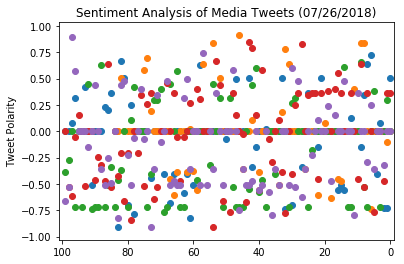

In [26]:
for user in target_users:
    curr_df = news_df.loc[news_df["User Names"] == user,:]
    plt.scatter(curr_df["Tweet Ago"], curr_df["Compound"], label= user)
plt.xlim(101, -1)
plt.title("Sentiment Analysis of Media Tweets (07/26/2018)")
plt.ylabel("Tweet Polarity")
plt.savefig("Images/Sentiment Analysis of Media Tweets.png")
plt.show()

In [5]:
avg_sentiment = news_df.groupby("User Names")["Compound"].mean()
avg_sentiment

User Names
@BBC        0.049249
@CBS        0.083407
@CNN       -0.090517
@FoxNews    0.015287
@nytimes   -0.094619
Name: Compound, dtype: float64

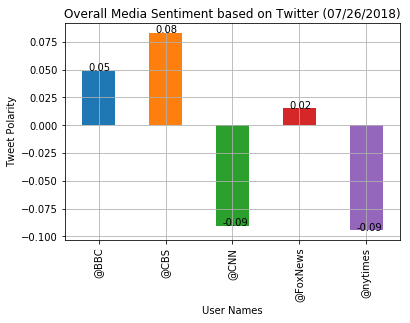

In [6]:
avg_sentiment.plot.bar(x= "User Names", y="compound", title= "Overall Media Sentiment based on Twitter (07/26/2018)", grid= True)
plt.xlabel=avg_sentiment.index
plt.ylabel("Tweet Polarity")
count = -.15
for sentiment in avg_sentiment:
    plt.text(count, sentiment, str(round(sentiment,2)))
    count = count + 1
plt.savefig("Images/Overall Media Sentiment based on Twitter.png")
plt.show()